## Estimating domain boundaries

The boundary of a domain is the shape that defines the exterior of the region. Many methods in spatial analysis require the use of boundary of the region of interest. For example, a Pair Correlation Function normalises against the density (counts over area) of objects in the region. Therefore having an appropriate boundary of the domain is critical to obtain accurate results in our spatial analysis. 

MuSpAn allows for any shapes of regions of interest to be a boundary of the domain, from simple squares to complicated non-convex shapes. Subsequently, we have provided a method in the `domain` class called `estimate_boundary` that enables use to update the shape of our boundary for a given set of objects. 

In this tutorial, we'll show the four different methods of estimating boundaries currently implemented in MuSpAn: (1) bounding box, (2) convex hull, (3) alpha shape, and (4) user-specified boundaries.

### Bounding box by default

We'll start by loading an example dataset with objects in a non-regular shape using our `datasets` module, namely, the 'Xenium-Healthy-Colon' dataset.

Whenever objects are added to a domain, `estimate_boundary` is called behind the scenes with the `method` parameter set to 'rectangle' by default (we'll see this explicitly soon). This automatically approximates the boundary of the domain as a bounding box. 

We can see this by visualising the boundary of the domain with the `show_boundary` parameter in visualise.

MuSpAn domain loaded successfully. Domain summary:
Domain name: Xenium-Healthy-Colon
Number of objects: 74174
Collections: ['Cell boundaries', 'Nucleus boundaries', 'Transcripts']
Labels: ['Cell ID', 'Transcript Counts', 'Cell Area', 'Cluster ID', 'Nucleus Area', 'Transcript', 'Transcript ID'] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x800 with 2 Axes>, <Axes: >)

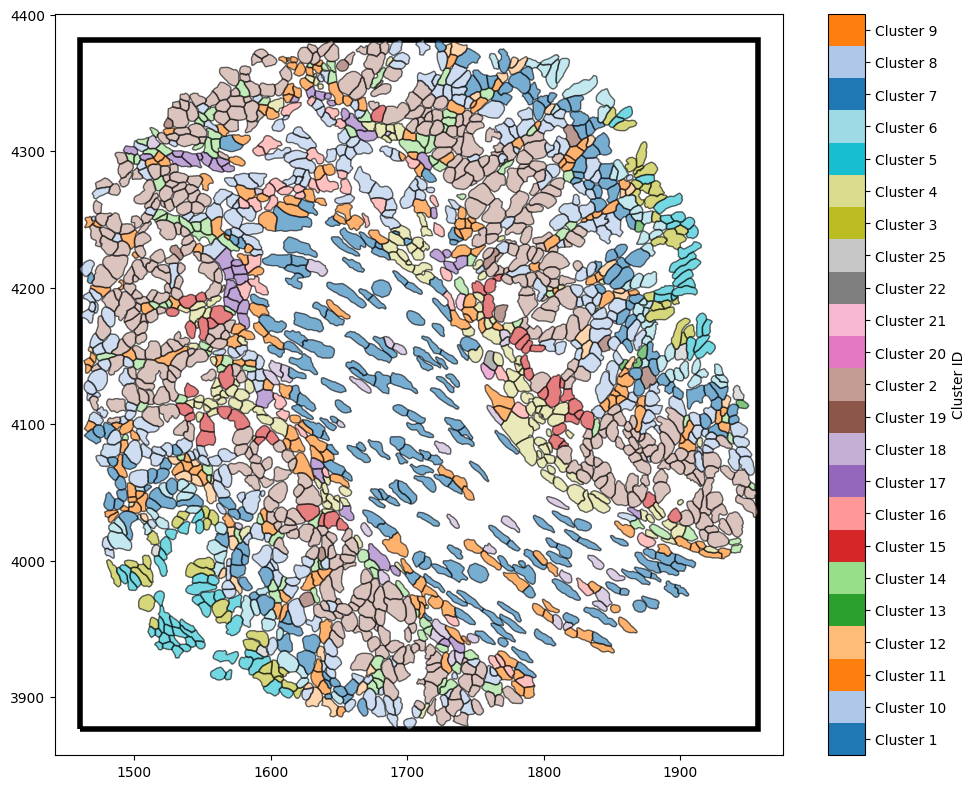

In [1]:
import muspan as ms

# Load an example domain dataset using the datasets module - see documentation for more details
example_domain = ms.datasets.load_example_domain('Xenium-Healthy-Colon')

# Visualise the domain with cell boundaries
ms.visualise.visualise(example_domain, 
                       color_by='Cluster ID', 
                       objects_to_plot=('collection', 'Cell boundaries'), 
                       show_boundary=True)

A bounding box boundary may be appropriate for rectangular domains (e.g., any of our synthetic datasets). However, here we can see that a box includes regions that are not a part of the tissue that we imported and so we might want to update this boundary if we are to conduct some spatial analysis.

### Convex hull


One of the methods we can use is to calculate the boundary is a the convex hull of the our spatial data. A convex hull is the smallest convex shape that encloses a given set of points in a geometric space. We can update our boundary using a convex hull by calling the `estimate_boundary` method in our example_domain with 'convex hull' argument.

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

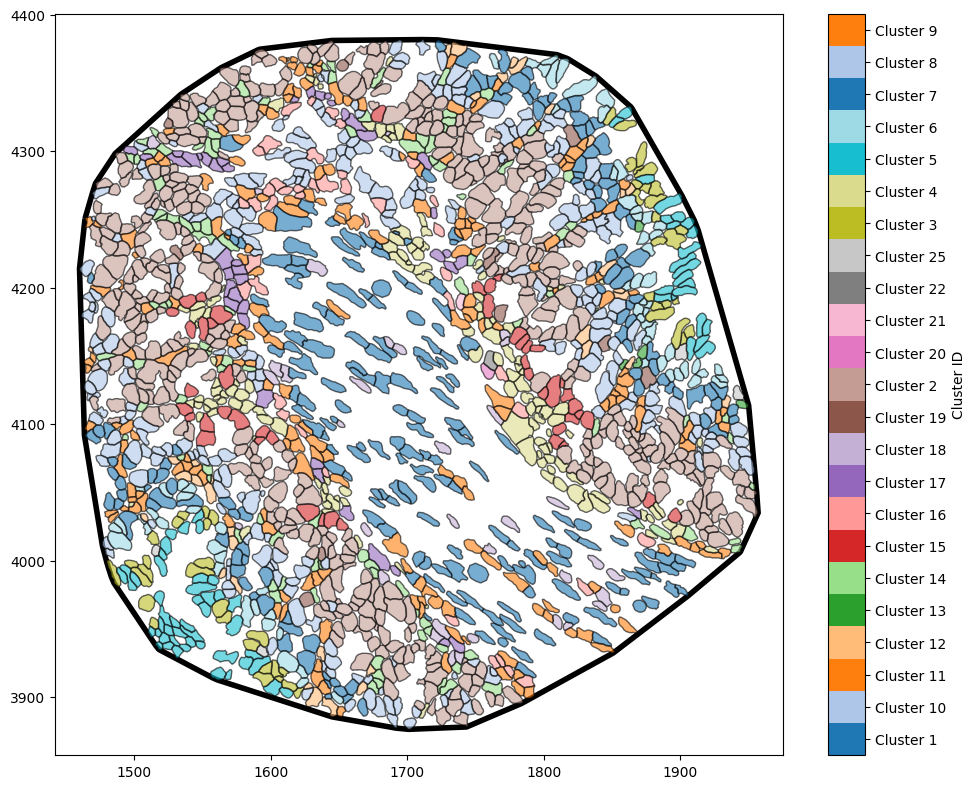

In [2]:
# Estimate the boundary using the convex hull method
example_domain.estimate_boundary(method='convex hull')

# Visualise the domain with the estimated boundary
ms.visualise.visualise(example_domain, 
                       color_by='Cluster ID', 
                       objects_to_plot=('collection', 'Cell boundaries'), 
                       show_boundary=True)

Now we have a boundary that is a much better representation edge of the tissue region we imported. 

### Alpha shapes

If our tissue region was not best presented by a convex shape (more irregular) then we could the alpha shape method. An alpha shape is a generalisation of the convex hull that captures the shape of a set of points by controlling the level of detail with a parameter α, allowing for both convex and concave boundaries. Intuitively, α controls the distance between objects that are able to form a boundary - the smaller the distance the tighter the boundary will to the data.

Again we estimate our boundary by now using the 'alpha shape' method where we have to specify the radius parameter 'alpha' as shown below.

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

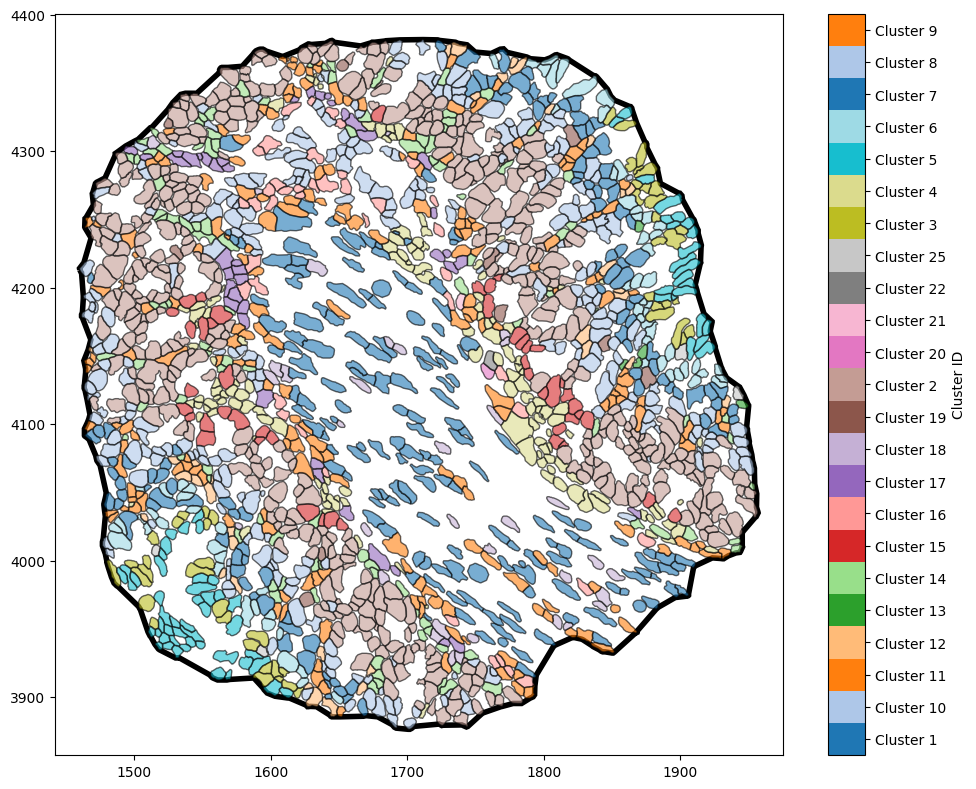

In [3]:
# Estimate the boundary using the alpha shape method with a specified alpha value
example_domain.estimate_boundary(method='alpha shape', 
                                 alpha_shape_kwargs={'alpha':15})

# Visualise the domain with the estimated boundary
ms.visualise.visualise(example_domain, 
                       color_by='Cluster ID', 
                       objects_to_plot=('collection', 'Cell boundaries'), 
                       show_boundary=True)

Now we have a boundary that very closely matches the outline of our objects with a non-convex shape.

**Note:** Complex boundaries (those with many edges) will increase the computational time for those spatial statistics that require the use of a boundary and therefore it's best to find a sweet spot between a good representation of a tissue boundary and simplicity.

### Specifying a boundary from coordinates


Finally, if we extracted an ROI from a larger tissue, we might have boundary coordinates produced from an external software - no approximation needed! In this case, we can specify the boundary using the 'specify' method, passing an arrary of boundary coordinates as shown below.

For this example, we'll just make up some arbitrary polygon that could represent a boundary.

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

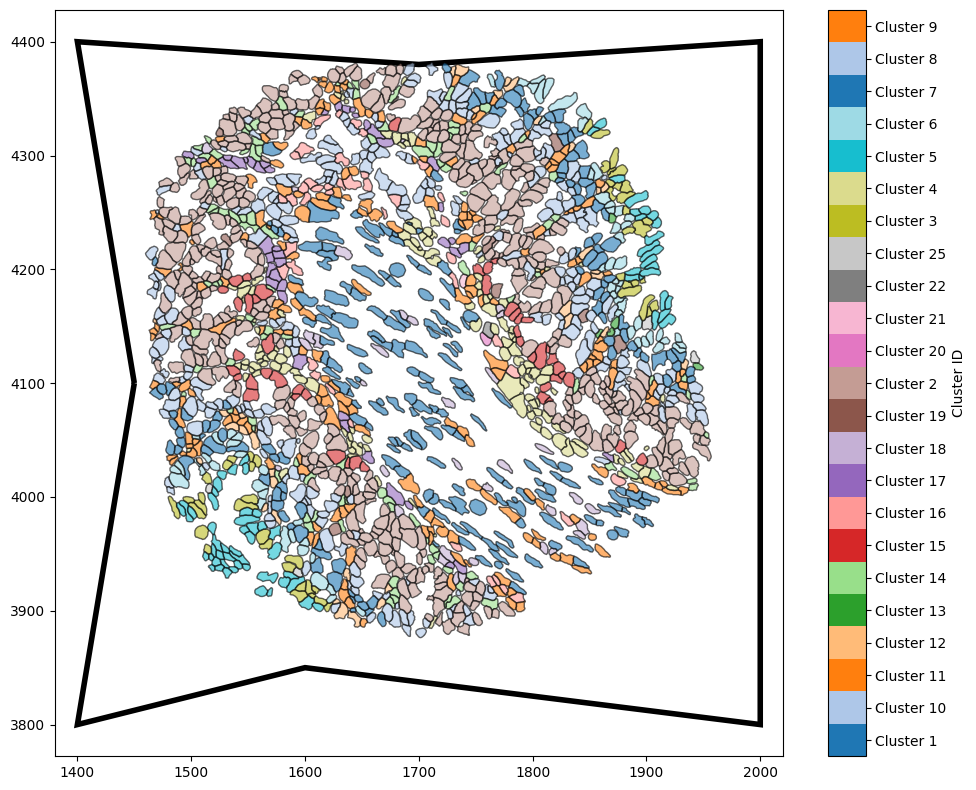

In [4]:
import numpy as np  

# Define boundary vertices as a numpy array of shape (n,2) where n is the number of vertices
some_boundary_vertices = np.array([
    [1400, 3800],
    [1600, 3850],
    [2000, 3800],
    [2000, 4400],
    [1700, 4380],
    [1400, 4400],
    [1450, 4100]
])    

# Estimate the boundary using the specified coordinates
example_domain.estimate_boundary(method='specify', 
                                 specify_boundary_coords=some_boundary_vertices)

# Visualise the domain with the specified boundary
ms.visualise.visualise(example_domain,
                       color_by='Cluster ID',
                       objects_to_plot=('collection', 'Cell boundaries'), 
                       show_boundary=True)